In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
k = np.linspace(0,1000,num=10000)
N = 1000
P = k/N

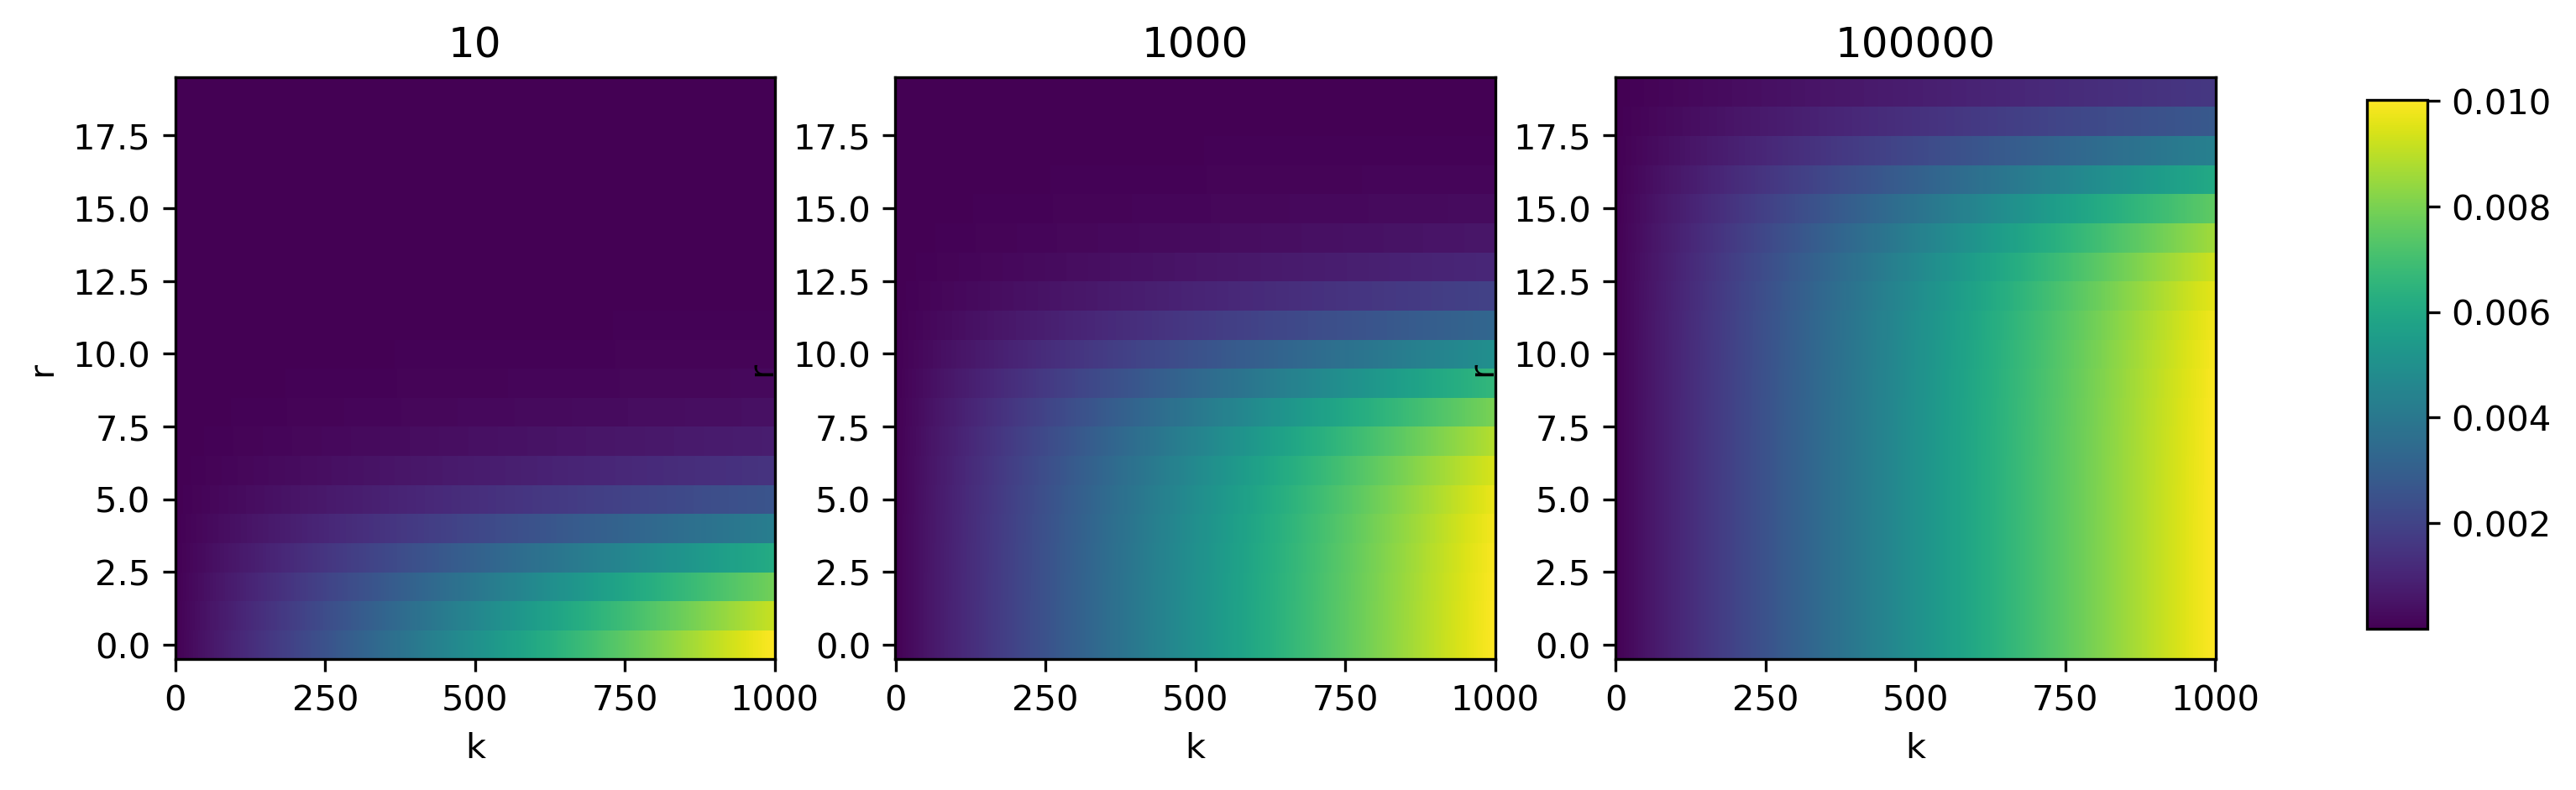

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker
from matplotlib.colors import LogNorm



# Define the function
N = 1000

def P_s(k, r,N):
    return (k + 1) / (N + 2**r)
def P(k,r,N):
    return k/N

# Generate values for k and r
k = np.linspace(0, N, 1000)
r = np.arange(0, 20)

K, R = np.meshgrid(k, r)




fig, axs = plt.subplots(1,3,figsize=(12, 3))

for i,N in enumerate([10,1000,100_000]):
    # Z = P(K,R,N) - P_s(K, R,N)
    Z = P_s(K,R,N)

    ax = axs[i]
    
    # im = sns.heatmap(Z, cmap='viridis', ax=ax, cbar=False)
    im = ax.pcolor(K, R, Z)
    ax.set_ylabel("r")
    ax.set_xlabel("k")
    ax.set_title(N)





fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
# fig.colorbar(axs[2].collections[0], ax=axs[2], label="Unsmoothed - smoothed")



plt.show()

set alpha = 1/2^r s.t. it always is N+1 in the denominator

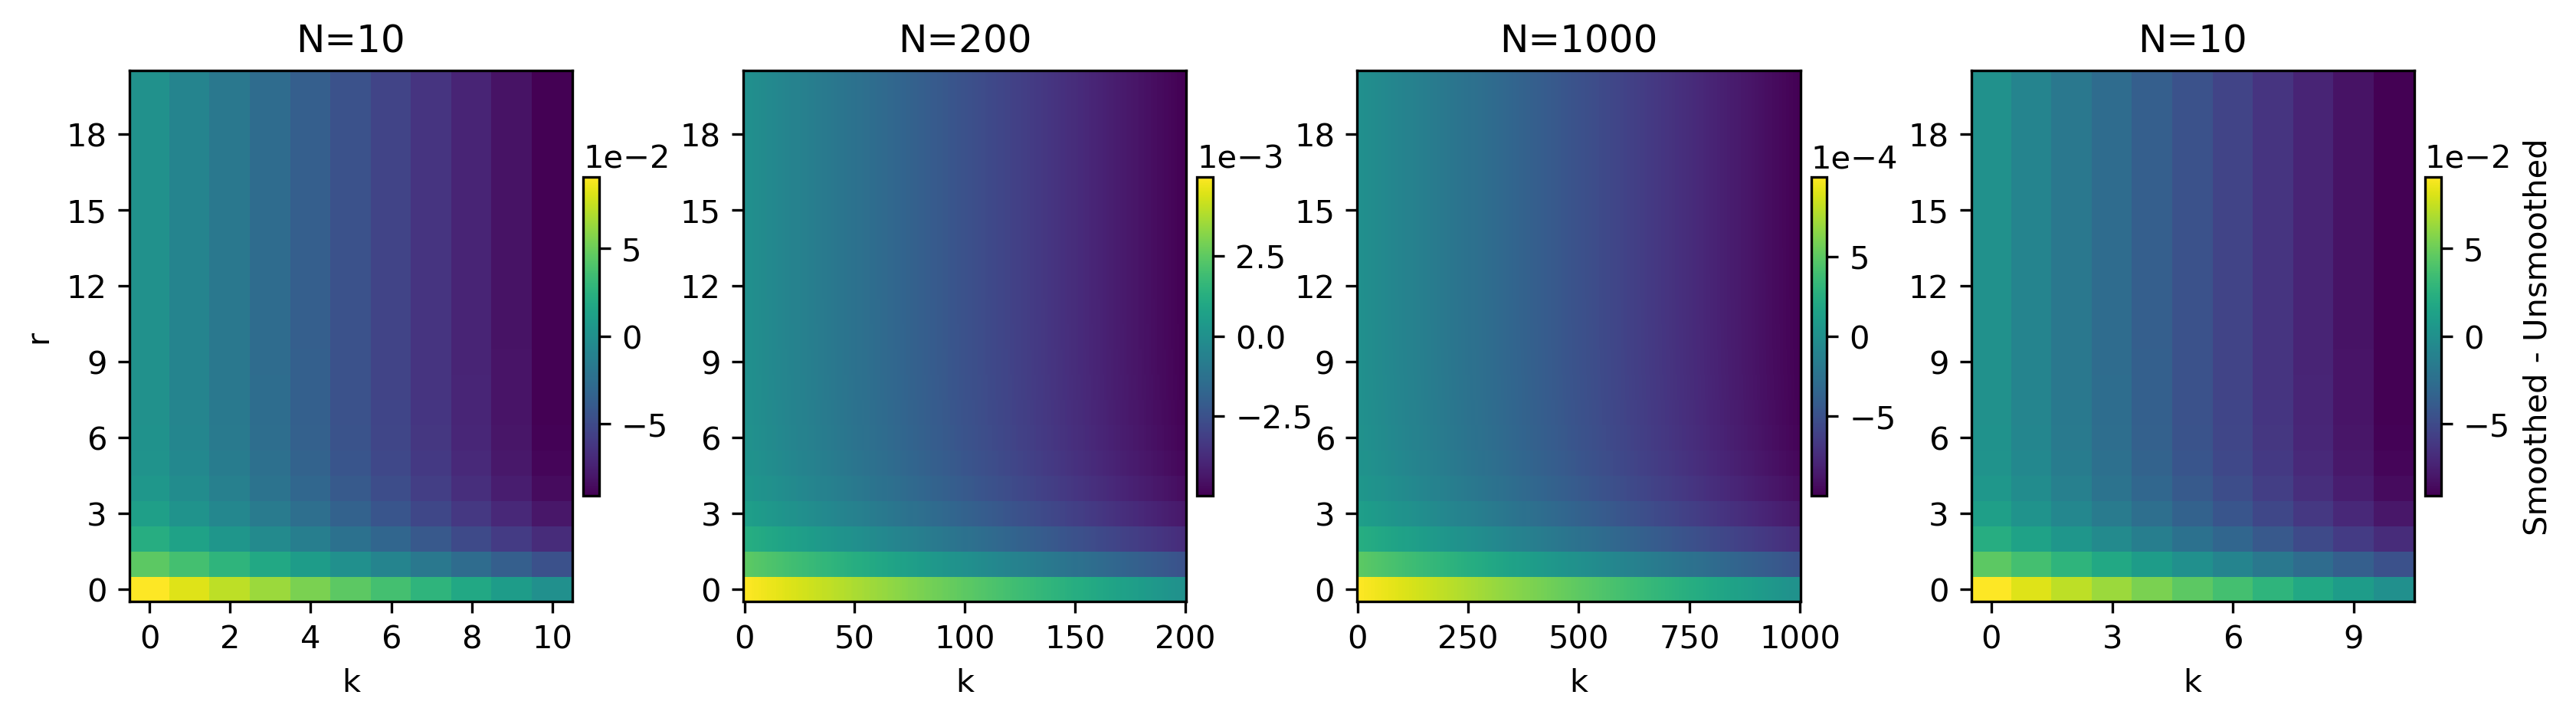

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter



N = 1000

def P_s(k, r,N):
    return (k + (1/2**r)) / (N + 1) # (1/2**r)*(2**r) = 1

def P(k,r,N):
    return k/N

r = np.arange(0, 21)



fig, axs = plt.subplots(1,4,figsize=(15, 3))

# for i,N in enumerate([10,200, 1000,100_000]):
for i,N in enumerate([10,200, 1000,10]):

    k = np.arange(0, N+1)
    K, R = np.meshgrid(k, r)
    Z = P_s(K, R,N) - P(K,R,N)
    
    # Z = P_s(K,R,N)

    ax = axs[i]
    
    # im = sns.heatmap(Z, cmap='viridis', ax=ax, cbar=False)
    im = ax.pcolor(K, R, Z, cmap="viridis")



    ax.yaxis.set_major_locator(plticker.MaxNLocator(9, integer=True))
    ax.xaxis.set_major_locator(plticker.MaxNLocator(5, integer=True))
    if i == 0:
        ax.set_ylabel("r")
        ax.xaxis.set_major_locator(plticker.MaxNLocator(6, integer=True))

    else:
        ax.set_ylabel(None)
        # ax.tick_params(
        #         axis='y',
        #         which='both',left=False, labelleft=False) 
    ax.set_xlabel("k")
    ax.set_title("N="+str(N))


    cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.6, pad=0.02)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.ax.yaxis.set_offset_position('left')  
    cbar.update_ticks()
    # cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.6, pad=0.02, format=ScalarFormatter(useMathText=True))

cbar.set_label("Smoothed - Unsmoothed")

fig.subplots_adjust(right=0.814)
# cbar_ax = fig.add_axes([0.84, 0.15, 0.01, 0.7])

# cbar = fig.colorbar(im, cax=cbar_ax)
# cbar.ax.set_ylabel("Smoothed - Unsmoothed", rotation=270, labelpad=15)

plt.subplots_adjust(wspace=0.15, hspace=0)


plt.show()

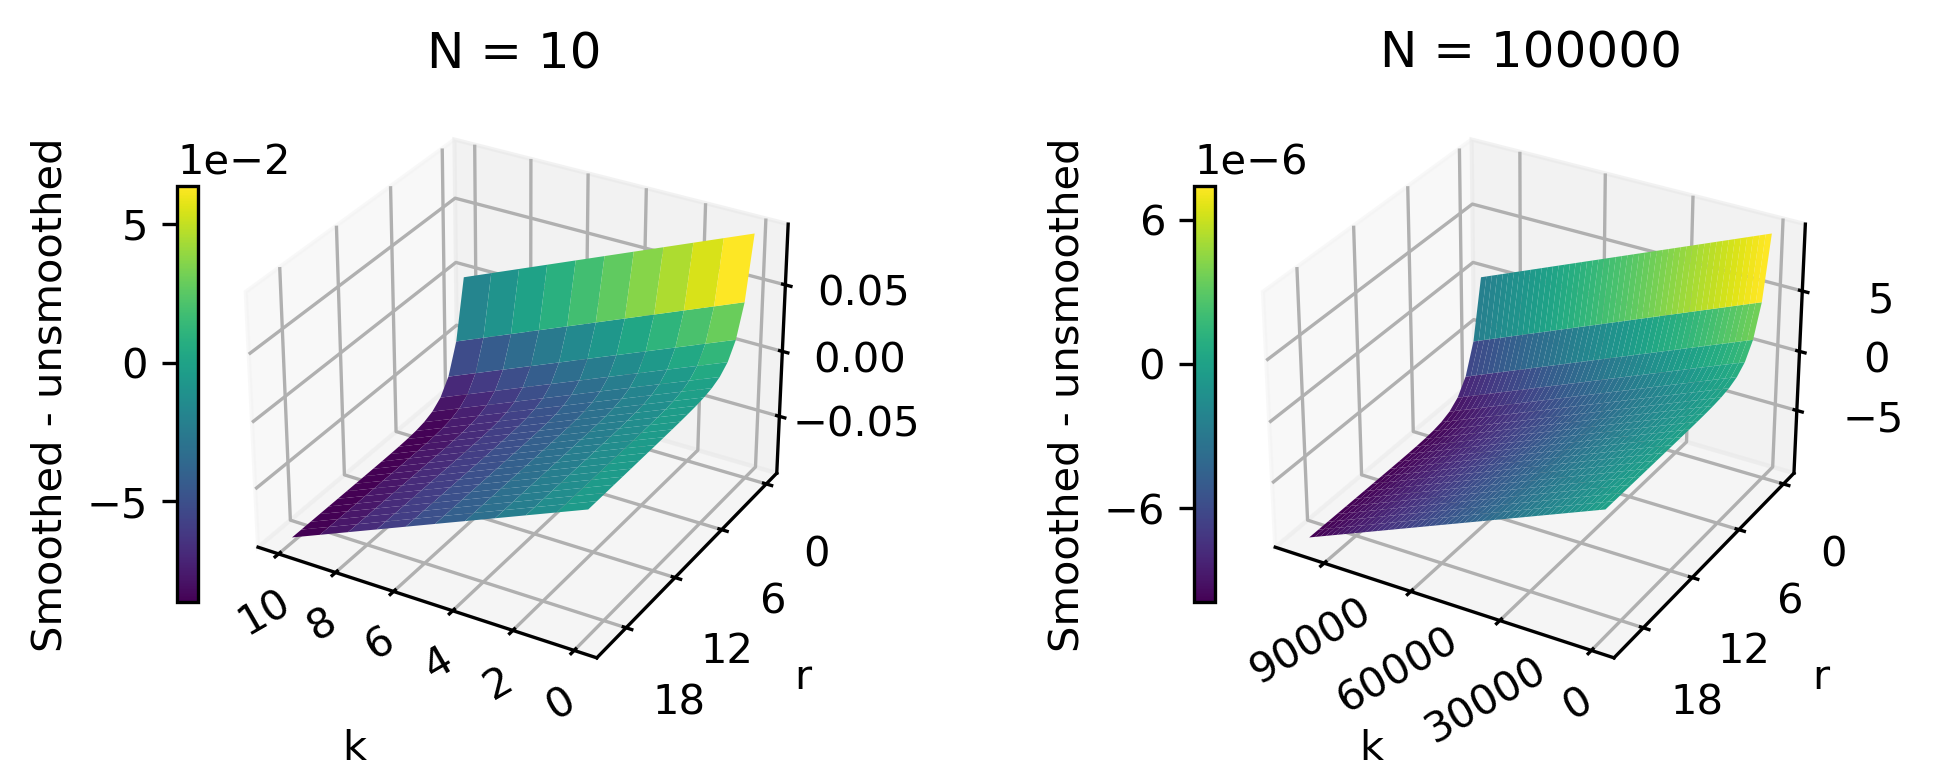

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Define the function
def P_s(k, r, N):
    return (k + (1 / 2 ** r)) / (N + 1)

def P(k, r, N):
    return k / N

# Generate values for k and r
r = np.arange(0, 21)

fig = plt.figure(figsize=(15/2, 3))

for i, N in enumerate([10,100_000]):
    k = np.arange(0, N + 1)
    K, R = np.meshgrid(k, r)
    Z = P_s(K, R, N) - P(K, R, N)
    # Z = P(K, R,N)

    
    ax = fig.add_subplot(1, 2, i + 1, projection='3d')
    
    surf = ax.plot_surface(K, R, Z, cmap='viridis', edgecolor='none')
    # Create colorbar axis

    cbar = fig.colorbar(surf, ax=ax, orientation='vertical', shrink=0.6, pad=0.02, location="left")
    cbar.set_label("Smoothed - unsmoothed")
    cbar.formatter.set_powerlimits((0, 0))
    cbar.ax.yaxis.set_offset_position('left')  
    cbar.locator =  plticker.MaxNLocator(nbins=3)
    cbar.update_ticks()


    ax.yaxis.set_major_locator(plticker.MaxNLocator(4, integer=True)) # depth axis
    if i == 0:
        ax.xaxis.set_major_locator(plticker.MaxNLocator(6, integer=True))

    else:
        ax.xaxis.set_major_locator(plticker.MaxNLocator(4, integer=True))


    for label in ax.get_xticklabels():
        label.set_rotation(30)
    ax.tick_params(axis='x', which='major', pad=-3)

    
    ax.set_title(f'N = {N}')
    ax.set_xlabel('k')
    ax.set_ylabel('r')
    # ax.set_zlabel('P')
    ax.view_init(azim=120, elev=30)
    
plt.subplots_adjust(wspace=.4, hspace=0) 

# plt.tight_layout()
plt.show()


In [117]:
Z[18, 800]

0.08

In [118]:
P_s(k, r,N)

ValueError: operands could not be broadcast together with shapes (10001,) (21,) 

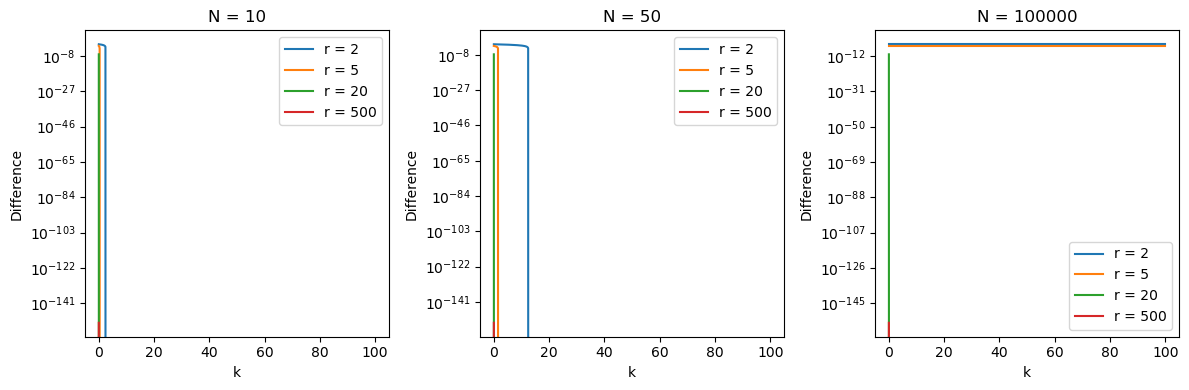

In [ ]:

def P_s(k, r,N):
    return (k + (1/2**r)) / (N + 1) # (1/2**r)*(2**r) = 1

def P(k,r,N):
    return k/N

import matplotlib.pyplot as plt

# Generate values for k

# Define the values for r
r_values = [2,5, 20, 500]
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
N_values = [10, 50,100000]
# Iterate over the subplots
for i, ax in enumerate(axs):
    # Iterate over the r values
    for r in r_values:
        k = np.linspace(0, N, 1000)

        # Calculate the values for P and P_s
        P_values = P(k, r, N_values[i])
        P_s_values = P_s(k, r, N_values[i])

        # Plot the lines
        # ax.semilogy(k, P_values, label=f'r = {r} ns')
        # ax.semilogy(k, P_s_values, label=f'r = {r}')
        ax.semilogy(k, P_s_values - P_values, label=f'r = {r}')

    
    # Set the title and labels for each subplot
    ax.set_title(f'N = {N_values[i]}')
    ax.set_xlabel('k')
    ax.set_ylabel('Difference')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
P_s_values

array([2.77721488e-152, 9.10000910e+000, 1.82000182e+001, 2.73000273e+001,
       3.64000364e+001, 4.55000455e+001, 5.46000546e+001, 6.37000637e+001,
       7.28000728e+001, 8.19000819e+001, 9.10000910e+001, 1.00100100e+002,
       1.09200109e+002, 1.18300118e+002, 1.27400127e+002, 1.36500137e+002,
       1.45600146e+002, 1.54700155e+002, 1.63800164e+002, 1.72900173e+002,
       1.82000182e+002, 1.91100191e+002, 2.00200200e+002, 2.09300209e+002,
       2.18400218e+002, 2.27500228e+002, 2.36600237e+002, 2.45700246e+002,
       2.54800255e+002, 2.63900264e+002, 2.73000273e+002, 2.82100282e+002,
       2.91200291e+002, 3.00300300e+002, 3.09400309e+002, 3.18500319e+002,
       3.27600328e+002, 3.36700337e+002, 3.45800346e+002, 3.54900355e+002,
       3.64000364e+002, 3.73100373e+002, 3.82200382e+002, 3.91300391e+002,
       4.00400400e+002, 4.09500410e+002, 4.18600419e+002, 4.27700428e+002,
       4.36800437e+002, 4.45900446e+002, 4.55000455e+002, 4.64100464e+002,
       4.73200473e+002, 4